In [1]:
from Gym import CCPP_Env
from Astar import Astar as astar
import numpy as np
import matplotlib.pyplot as plt

ccpp = CCPP_Env(map_file='CDL_Ground.vectormap.json', agent_dims=[0.2, 0.2], agent_loc = [7.5, 0], scaling=10)




/Users/shikh/Library/CloudStorage/OneDrive-Personal/Documents/RL/library_project/Gym.py:203: RuntimeWarning: invalid value encountered in true_divide
  vec = (np.array([i, j]) - self.agent_loc) / np.linalg.norm(
/Users/shikh/Library/CloudStorage/OneDrive-Personal/Documents/RL/library_project/Gym.py:217: RuntimeWarning: invalid value encountered in true_divide
  vec = (np.array([i, j]) - self.agent_loc) / np.linalg.norm(


coverage possible:  43696


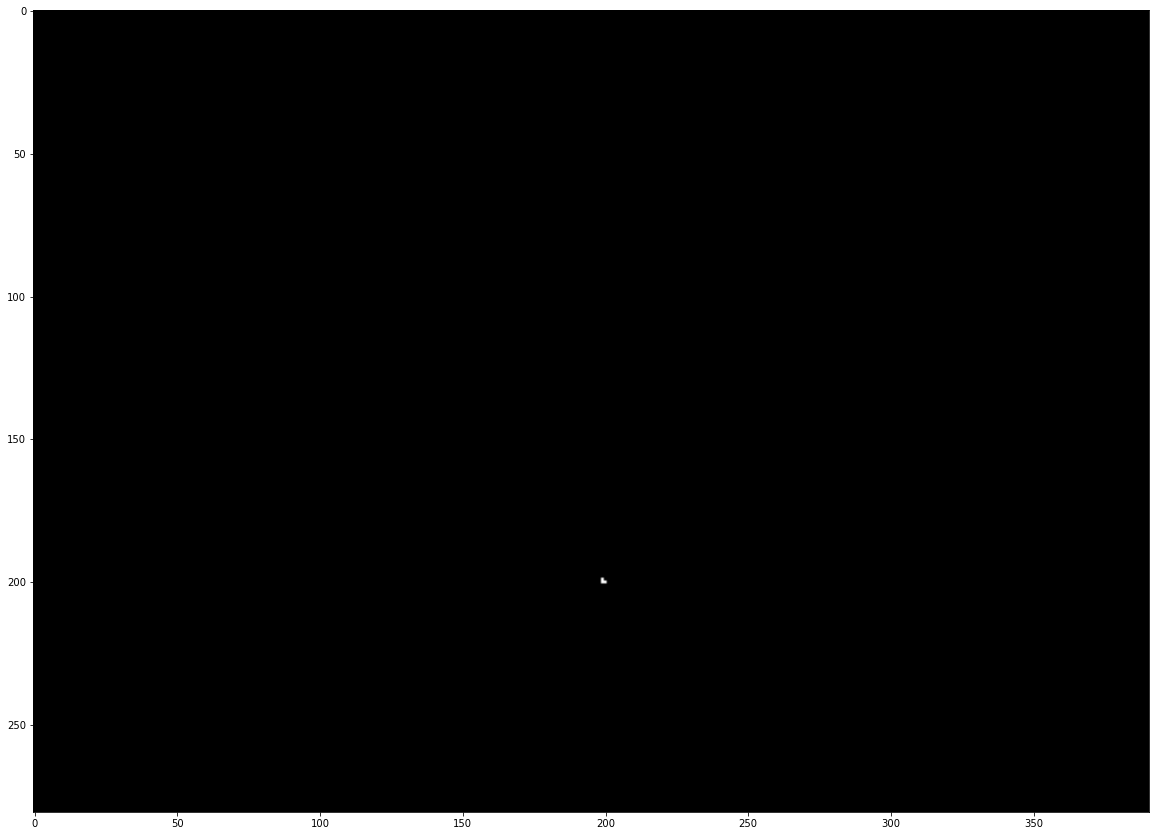

In [2]:
plt.figure(figsize=(20,20))
plt.imshow(ccpp.agent_channel, cmap='gray')

/Users/shikh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/shikh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


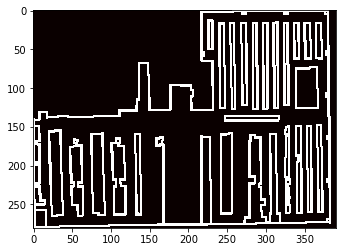

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

coverage_grid = ccpp.astar.coverage_grid
# plot the weighted grid
plt.imshow(coverage_grid, cmap='hot', interpolation='nearest')


Source:  [145 370]  Destination:  [150 200]
The destination cell is found
The Path is 
total time:  58.22527317523013 coverage:  304.9
Reward:  33.244726824769856
Source:  [150 200]  Destination:  [150  50]
The destination cell is found
The Path is 
total time:  50.01547541484421 coverage:  306.3
Reward:  41.87452458515579
Source:  [150  50]  Destination:  [275  50]
The destination cell is found
The Path is 
total time:  42.920312520470034 coverage:  137.7
Reward:  -1.610312520470039
Source:  [275  50]  Destination:  [275  20]
The destination cell is found
The Path is 
total time:  10.877920802656034 coverage:  24.8
Reward:  -3.437920802656034
Source:  [275  20]  Destination:  [150  20]
The destination cell is found
The Path is 
total time:  43.01019116894519 coverage:  139.0
Reward:  -1.3101911689451953
Source:  [150  20]  Destination:  [150 350]
The destination cell is found
The Path is 
total time:  111.57427654226233 coverage:  35.9
Reward:  -100.80427654226233
Source:  [150 350]  

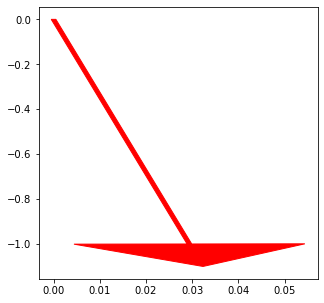

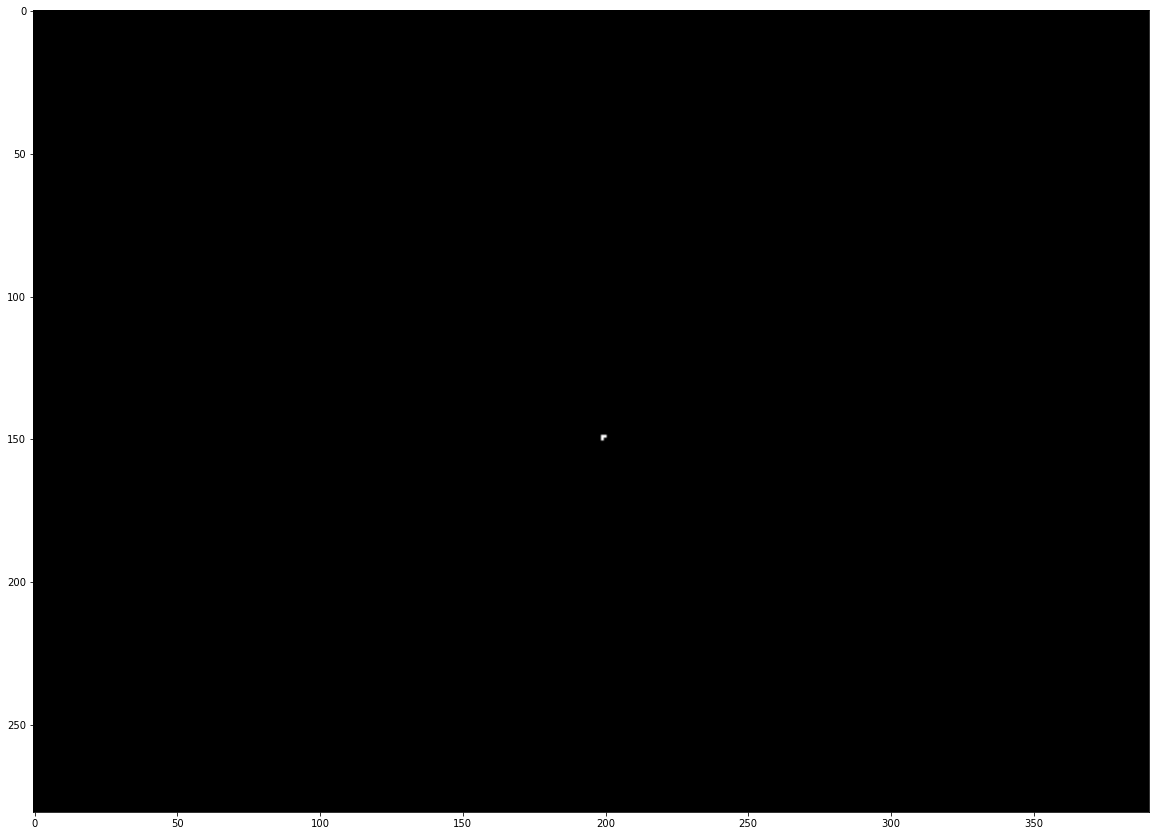

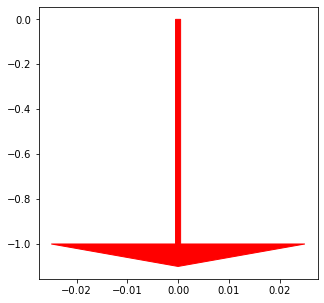

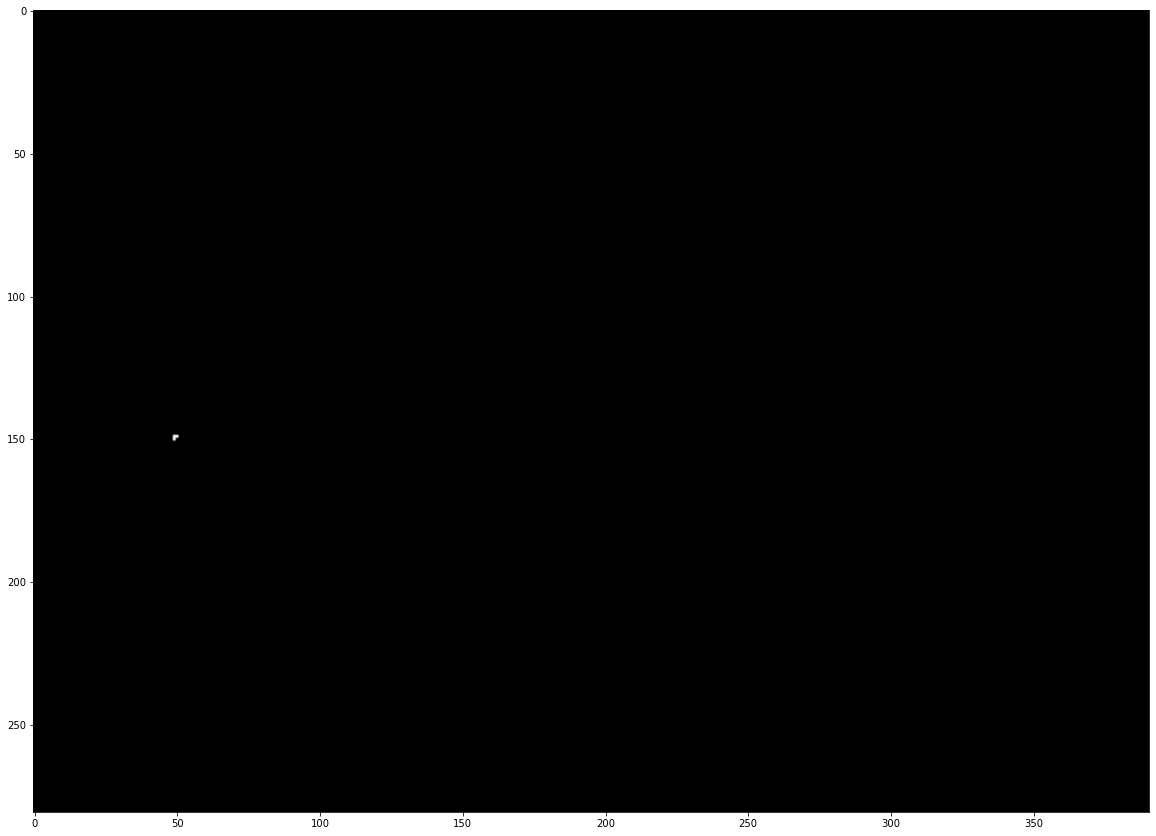

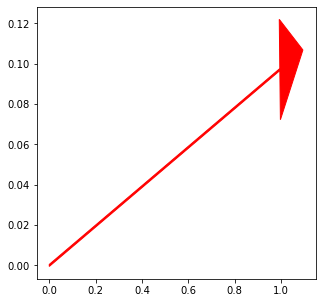

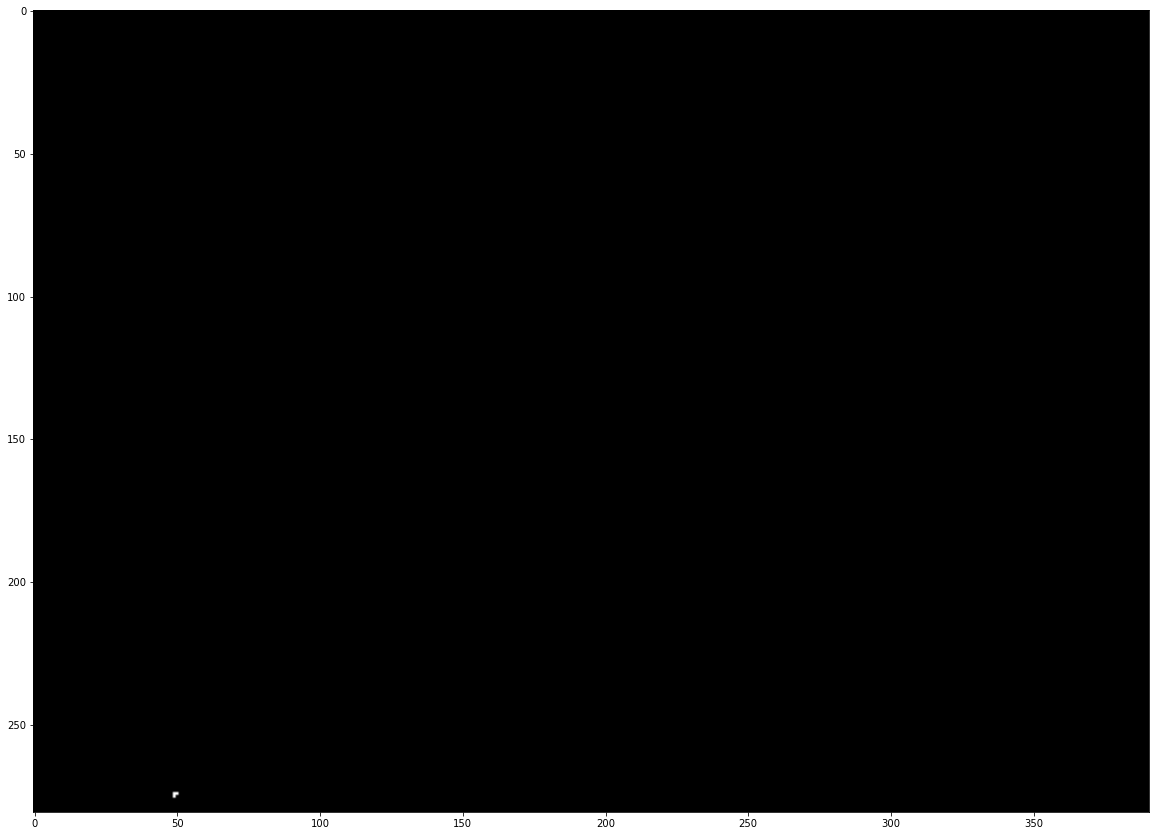

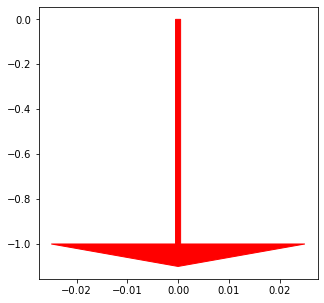

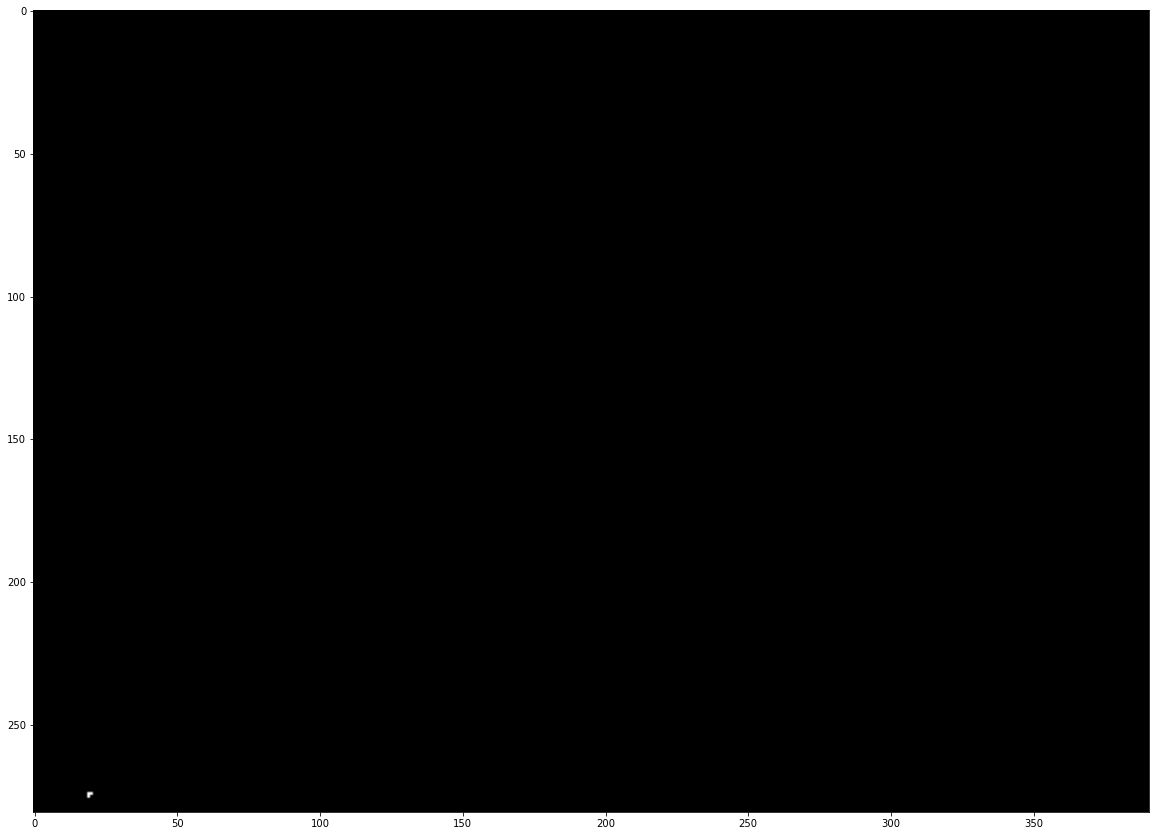

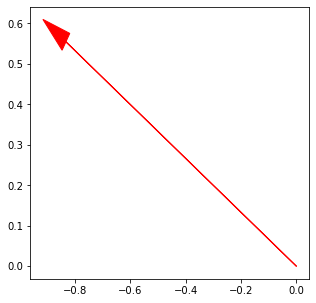

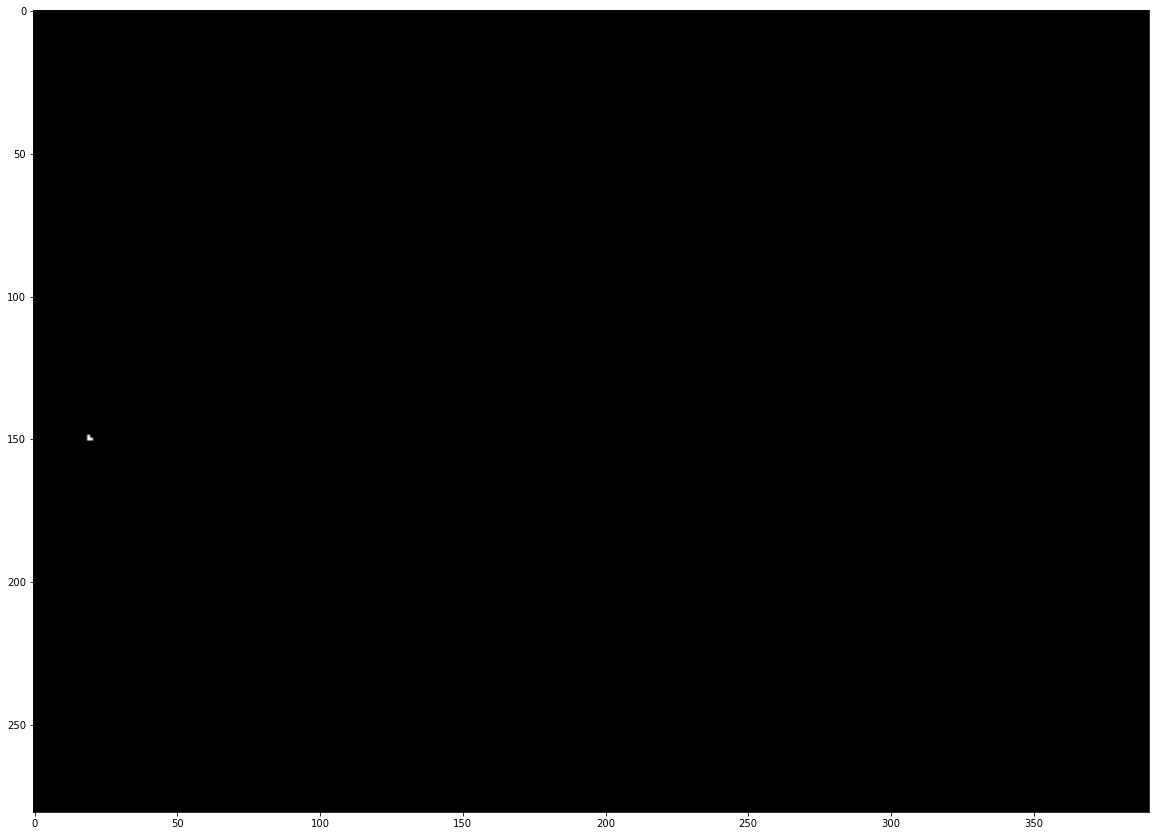

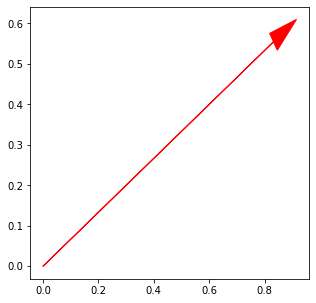

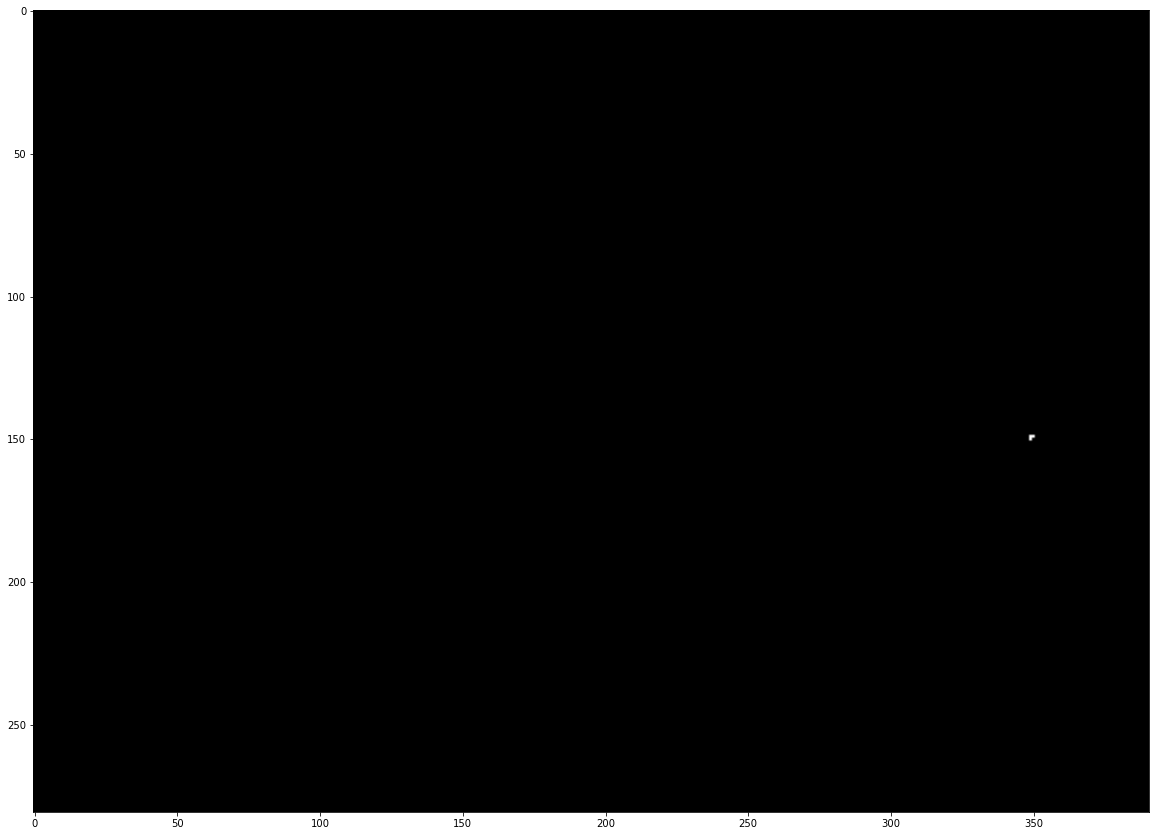

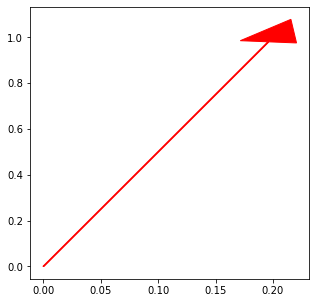

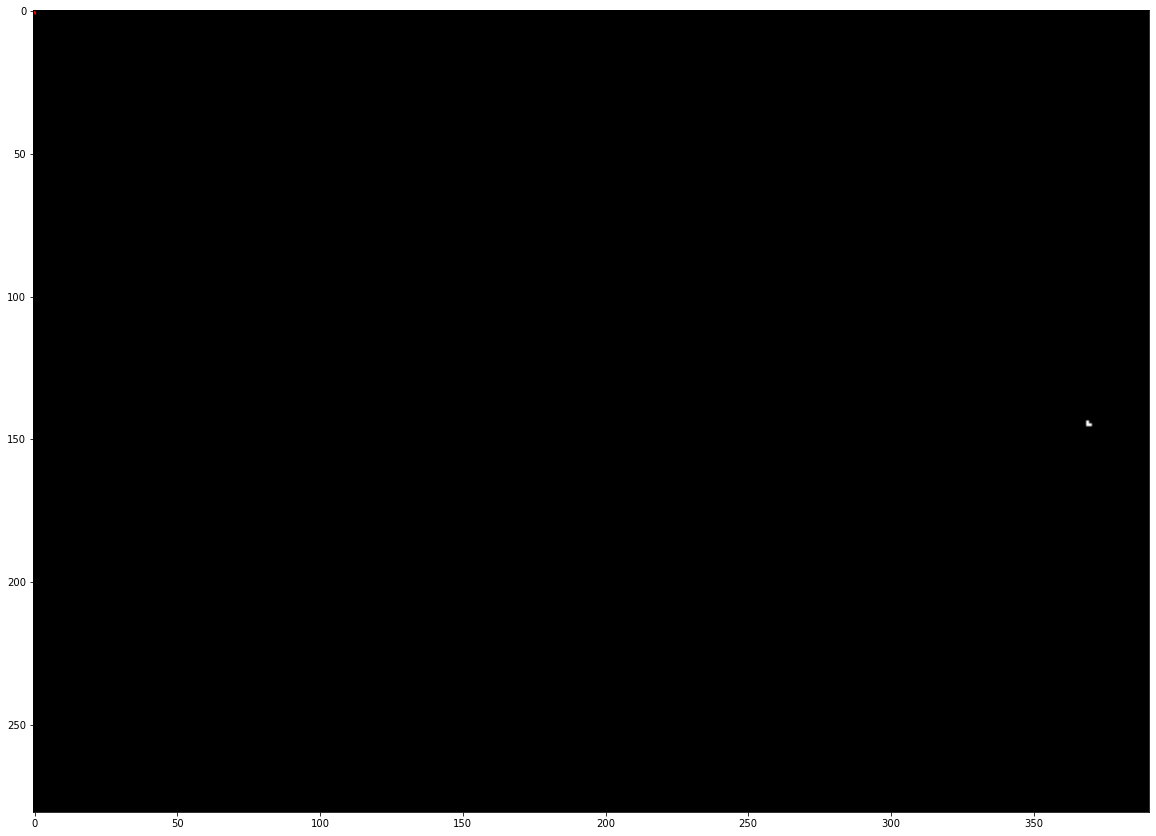

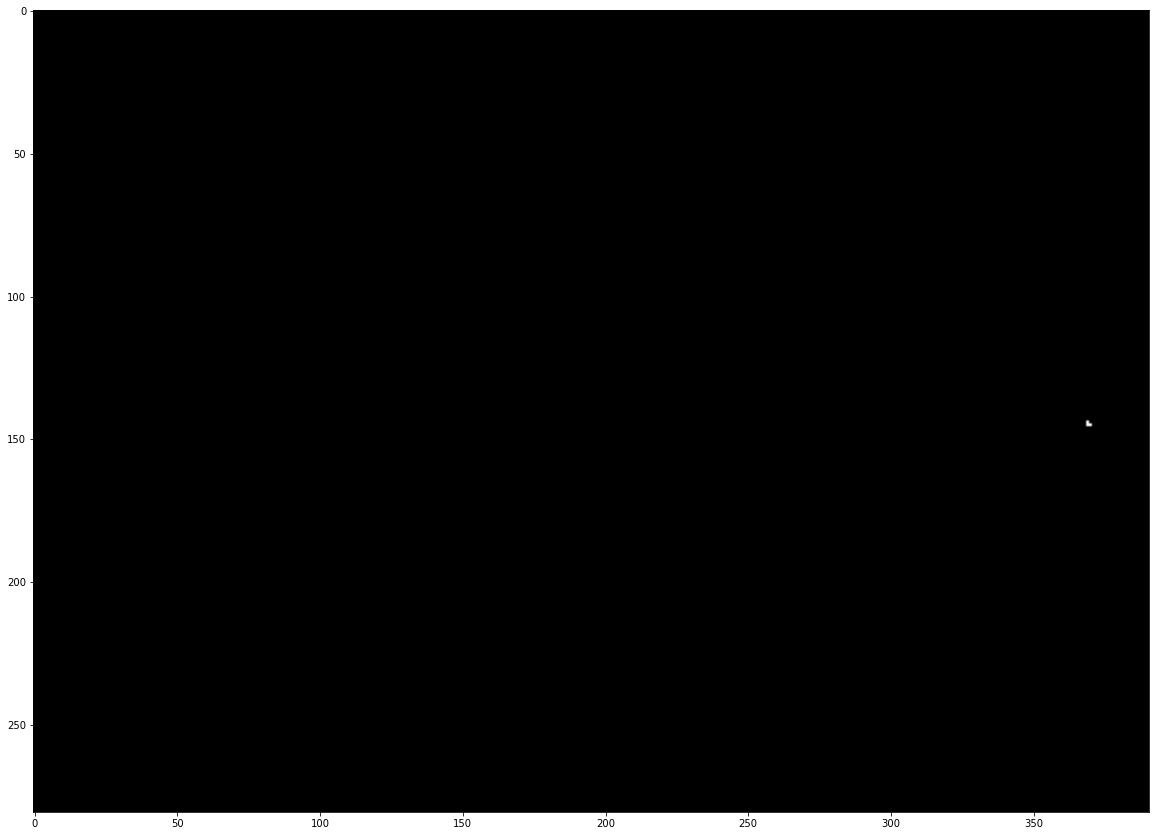

In [11]:
import os
nav_goals = [[150, 200], [150, 50], [275, 50], [275, 20], [150,20], [150, 350], [145, 370]]
ccpp.reset()
for nav_goal in nav_goals:
    transformed_goal = ccpp.transform_map_to_xy(nav_goal[0], nav_goal[1])
    next_state, reward, done, info = ccpp.step([transformed_goal[0], transformed_goal[1], 1])
    print("Reward: ", reward)
    plt.figure(figsize=(5,5))
    plt.arrow(0, 0, ccpp.agent_dir[0], ccpp.agent_dir[1], head_width=0.05, head_length=0.1, fc='r', ec='r')
    plt.figure(figsize=(20,20))
    plt.imshow(ccpp.agent_channel, cmap='gray') 
    # get the path
# send a terminal signal
next_state, reward, done, info = ccpp.step([0, 0, -1])
print("Termination Reward: ", reward)

# plot the weighted grid
# super impose the coverage channe on top of the map channel
plt.arrow(0, 0, ccpp.agent_dir[0], ccpp.agent_dir[1], head_width=0.05, head_length=0.1, fc='r', ec='r')
plt.figure(figsize=(20,20))

plt.imshow(ccpp.agent_channel, cmap='gray')


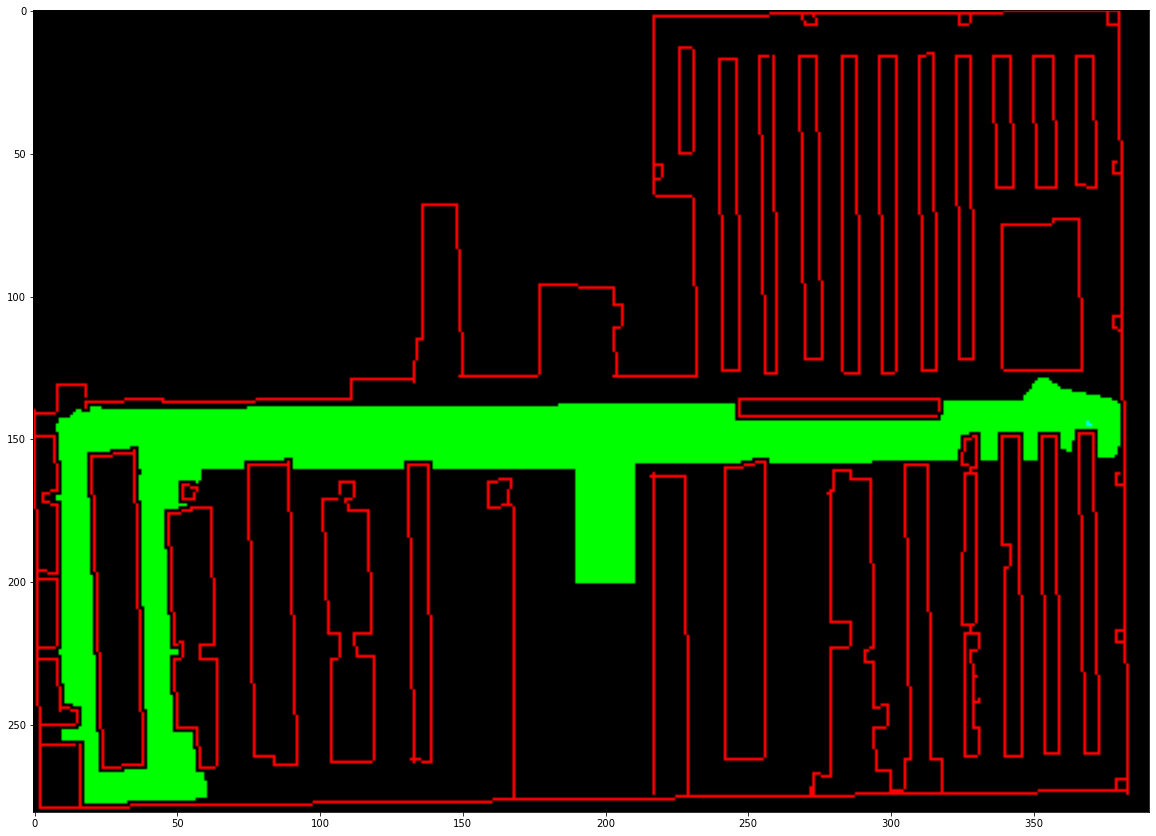

In [5]:

plt.figure(figsize=(20, 20))
plt.imshow(np.stack([ccpp.map_channel, ccpp.coverage_channel, ccpp.agent_channel]).transpose(1, 2, 0))
# make figure bigger
